In [0]:
import numpy as np
import pandas as pd

In [0]:
df=pd.read_csv('/content/smsspamcollection.tsv',sep='\t')

In [0]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [0]:
#Check if there are any missing values
df.isnull()

,label,message,length,punct
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
5567,False,False,False,False
5568,False,False,False,False
5569,False,False,False,False
5570,False,False,False,False


In [0]:
#Count if there are any missing values
df.isnull().sum()
#So, there are no missing values

label      0
message    0
length     0
punct      0
dtype: int64

In [0]:
#Check the number of messages present in the file
#This can beobtained by calculating the length of the dataframe
len(df)

5572

In [0]:
#Let us check the label column
df['label']

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5572, dtype: object

In [0]:
#Looking at the output it is conatining mostly HAM and SPAM as values
#Now let us check the unique values presentin the label column
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [0]:
#Let us now calculate the number  of SPAM,HAM present in the label column
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [0]:
#We are going to create a model which will identify if a message is SPAM or HAM based on the features
#length of the message and punct of the message
#Now let us try to plot the distribution of the length of all the messages present in the text file
import matplotlib.pyplot as plt

In [0]:
%matplotlib inline

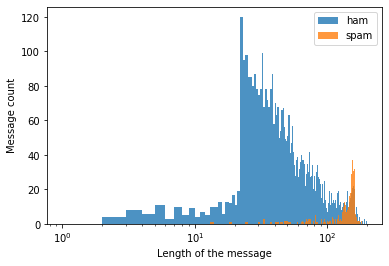

In [0]:
plt.xscale('log')
binslen=np.arange(0,200)
plt.hist(df[df['label']=="ham"]['length'],bins=binslen,alpha=0.8)
plt.hist(df[df['label']=='spam']['length'],bins=bins,alpha=0.8)
plt.xlabel("Length of the message")
plt.ylabel("Message count")
plt.legend(('ham','spam'))
plt.show()
#We observe Spam messages are lengthy

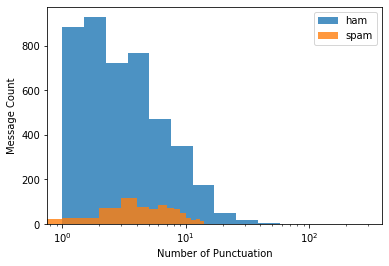

In [0]:
plt.xscale('log')
binslen=1.5**(np.arange(0,15))
plt.hist(df[df['label']=="ham"]['punct'],bins=binslen,alpha=0.8)
plt.hist(df[df['label']=='spam']['punct'],bins=bins,alpha=0.8)
plt.xlabel("Number of Punctuation")
plt.ylabel("Message Count")
plt.legend(('ham','spam'))
plt.show()


In [0]:
#Create Training and Test Data
from sklearn.model_selection import train_test_split

In [0]:
#X is feature data i.e. independent variable which will be length and punct column
X=df[['length','punct']]
#y is our label data i.e dependent varibale which will be label column
y=df['label']

In [0]:
#Let us view the X data

In [0]:
X

,length,punct
0,111,9
1,29,6
2,155,6
3,49,6
4,61,2
...,...,...
5567,160,8
5568,36,1
5569,57,7
5570,125,1


In [0]:
#Let us view the y data
y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5572, dtype: object

In [0]:
#The order of X_train,X_test,y_train,y_test is important
#X_train,y_train,X_test,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [0]:
#Let us check the length of X Training Data
len(X_train)

3900

In [0]:
#Let us check the length of y Training Data
len(y_train)

3900

In [0]:
#View X_train data
X_train

,length,punct
708,49,6
4338,29,0
5029,67,1
4921,48,2
2592,44,3
...,...,...
3772,81,3
5191,22,2
5226,45,8
5390,26,0


In [0]:
#View X_train shape
X_train.shape

(3900, 2)

In [0]:
#Check X_test shape
X_test.shape

(1672, 2)

In [0]:
#Check y_train shape
y_train.shape

(3900,)

In [0]:
#Check y_test shape
y_test.shape

(1672,)

In [0]:
#Let us create the Machine Learning Model
from sklearn.linear_model import LogisticRegression

In [0]:
#Create instance of Logistic Regression
logreg=LogisticRegression(solver='lbfgs')

In [0]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
#Predict the predictions
y_pred=logreg.predict(X_test)

In [0]:
#Check the shape of the predictions
#Shape of predictions y_pred and shape of y_test
y_pred.shape

(1672,)

In [0]:
#Let us take a look at the predictions
y_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [0]:
#let us evaluation the model
from sklearn import metrics

In [0]:
#View the confusion matrice
from sklearn.metrics import confusion_matrix

In [0]:
cm=confusion_matrix(y_test,y_pred)

In [0]:
cm

array([[1404,   44],
       [ 219,    5]])

In [0]:
#View the confusion matrix with the labels
dd=pd.DataFrame(cm,index=['ham','spam'],columns=['ham','spam'])

In [0]:
dd

,ham,spam
ham,1404,44
spam,219,5


In [0]:
#View the classification report
from sklearn.metrics import classification_report

In [0]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n         ham       0.87      0.97      0.91      1448\n        spam       0.10      0.02      0.04       224\n\n    accuracy                           0.84      1672\n   macro avg       0.48      0.50      0.48      1672\nweighted avg       0.76      0.84      0.80      1672\n'

In [0]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.87      0.97      0.91      1448
        spam       0.10      0.02      0.04       224

    accuracy                           0.84      1672
   macro avg       0.48      0.50      0.48      1672
weighted avg       0.76      0.84      0.80      1672



In [0]:
#View the accuracy score
from sklearn.metrics import accuracy_score

In [0]:
accuracy_score(y_test,y_pred)

0.8427033492822966

In [0]:
print(accuracy_score(y_test,y_pred))

0.8427033492822966


In [0]:
#Now let us create a model with another algorithm
from sklearn.naive_bayes import MultinomialNB

In [0]:
#Create an instance of Naive Bayes 
nb_model=MultinomialNB()

In [0]:
#fit the Multinomial model with training data
nb_model.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
#Predict the values using the multinomial model created
ynb_pred=nb_model.predict(X_test)

In [0]:
#Check the shape of ynb_pred
#This should be equal to the shape of y_test
ynb_pred.shape

(1672,)

In [0]:
#Print the confusion matrix,classification report,accuracy score
ddnb=pd.DataFrame(metrics.confusion_matrix(y_test,ynb_pred),index=['ham','spam'],columns=['ham','spam'])

In [0]:
ddnb

,ham,spam
ham,1404,44
spam,219,5


In [0]:
#View the classification report
print(metrics.classification_report(y_test,ynb_pred))

              precision    recall  f1-score   support

         ham       0.87      0.99      0.92      1448
        spam       0.00      0.00      0.00       224

    accuracy                           0.86      1672
   macro avg       0.43      0.50      0.46      1672
weighted avg       0.75      0.86      0.80      1672



In [0]:
#View the accuracy score
print(metrics.accuracy_score(y_test,ynb_pred))

0.8600478468899522


In [0]:
#Let us build Suppor Vector classification model
from sklearn.svm import SVC

In [0]:
#Create instance of Support Vector cassification model
svcmod=SVC()
#svcmod=SVC(gamma='auto')
#This can be set to auto

In [0]:
#Fit the training data to the created Support Vector classification instance
svcmod.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
#Predict the values using the SVC model
ysvc_pred=svcmod.predict(X_test)

In [0]:
#Check the shape of ysvc_pred
#This hould be equal to y_test
ysvc_pred.shape

(1672,)

In [0]:
#Print the confusionmatrix
ddsv=pd.DataFrame(metrics.confusion_matrix(y_test,ysvc_pred),index=['ham','spam'],columns=['ham','spam'])

In [0]:
ddsv

,ham,spam
ham,1420,28
spam,186,38


In [0]:
#View Classification Report
print(metrics.classification_report(y_test,ysvc_pred))

              precision    recall  f1-score   support

         ham       0.88      0.98      0.93      1448
        spam       0.58      0.17      0.26       224

    accuracy                           0.87      1672
   macro avg       0.73      0.58      0.60      1672
weighted avg       0.84      0.87      0.84      1672



In [0]:
#View the accuracy score
print(metrics.accuracy_score(y_test,ysvc_pred))

0.8720095693779905


##Text Feature Extraction-Code Along Implementations




In [0]:
import numpy as np
import pandas as pd

In [0]:
df=pd.read_csv('/content/smsspamcollection.tsv',sep='\t')

In [0]:
#Check if there are any missing values in the dataframe created
df.isnull()

,label,message,length,punct
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
5567,False,False,False,False
5568,False,False,False,False
5569,False,False,False,False
5570,False,False,False,False


In [0]:
#Check for the count of missing values in the created dataframe labels
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [0]:
#Count the unique values present inthe label column of the df
#Get the cont of ham
#Get the count of spam
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [0]:
#Create the Feature i.e. X i.e independent label i.e. put the "message" column data into the X
X=df['message']

In [0]:
#View X
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5572, dtype: object

In [0]:
#Create the dependent variable y i.e. put the "label" column data into y
y=df['label']

In [0]:
#View y
y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5572, dtype: object

In [0]:
#Train Set Test set splitting
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [0]:
#Perform count Vectorization
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
#Create an instance of Count Vectorizer
count_vect=CountVectorizer()

In [0]:
#Content in X is not changed yet
#It is still containing the raw text
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5572, dtype: object

In [0]:
#Now we shoud pass this raw text into the Count Vectorizer
#This can be done in two ways
#############    Way   1    #############
#FIT THE VECTORIZER TO THE DATA(buid a vocabulary, count the number of words)
#Here we fit only the X_train data
#############################################count_vect.fit(X_train)

#TRANSFORM THE ORIGINAL TEXT MESSAGE INTO A VECTOR
#############################################X_train_counts=count_vect.transform(X_train)


#############    Way   2    #############
#Directly fit and transform in a same step
X_train_counts=count_vect.fit_transform(X_train)

In [0]:
X_train_counts

<3900x7263 sparse matrix of type '<class 'numpy.int64'>'
	with 52150 stored elements in Compressed Sparse Row format>

In [0]:
#Check the shapeof original X_train
X_train.shape

(3900,)

In [0]:
#Check the document term matrix obtained after vectorization
X_train_counts.shape

(3900, 7263)

In [0]:
#Let us try printing X_train_counts
print(X_train_counts)

  (0, 5197)	1
  (0, 3756)	1
  (0, 3750)	1
  (0, 971)	1
  (0, 260)	1
  (0, 933)	1
  (0, 7162)	1
  (0, 2282)	1
  (1, 4622)	1
  (1, 6619)	1
  (1, 4473)	1
  (1, 5261)	1
  (2, 2950)	1
  (2, 1611)	1
  (2, 793)	1
  (2, 3181)	2
  (2, 891)	1
  (2, 5494)	1
  (2, 4710)	1
  (2, 7015)	1
  (2, 5708)	1
  (2, 1938)	1
  (2, 6374)	1
  (2, 6104)	1
  (3, 5567)	1
  :	:
  (3895, 7105)	1
  (3895, 7089)	1
  (3895, 3857)	1
  (3896, 3882)	1
  (3896, 1487)	1
  (3896, 3759)	1
  (3896, 5945)	1
  (3897, 3149)	1
  (3897, 5272)	1
  (3897, 2801)	1
  (3897, 5022)	1
  (3897, 5950)	1
  (3897, 5949)	1
  (3898, 6502)	1
  (3898, 5661)	1
  (3898, 4537)	1
  (3898, 3583)	1
  (3899, 3487)	1
  (3899, 2138)	1
  (3899, 3137)	1
  (3899, 3612)	1
  (3899, 5563)	1
  (3899, 6273)	1
  (3899, 5912)	1
  (3899, 4390)	1


##Text Feature Extraction-Code Along-Part Two

In [0]:
#Create term frequency inverse document frequency vecorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [0]:
#Create an instance of the TfidfTransformer
tfidf_transfomer=TfidfTransformer()

In [0]:
#The results of the previously obtained term frequencies by count vectorization should be passed to the TfidfTransformer
X_train_tfidf=tfidf_transfomer.fit_transform(X_train_counts)

In [0]:
#Let us check the shape of tfidf that is fitted with the term frequency counts
X_train_tfidf.shape

(3900, 7263)

In [0]:
# We generally perform count vectorization
#Then, we perform, tfidf transformation
#the above are performed in two different steps
#But scikit gives us an option to perform both the steps as a single step
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
#Create an object of this Vectorizer
vectorizer=TfidfVectorizer()

In [0]:
#Here we fit the vectorizer with the original X_train
#We directly fit the original data
#No need to count the term document frequency and then calculating the inverse term document frequency
X_train_combtfidf=vectorizer.fit_transform(X_train)

In [0]:
#Let us create a classifier
#For example LinearSupport Vector classifier
from sklearn.svm import LinearSVC

In [0]:
#Create the object of Linear Support Vector Classifier
clf_svc=LinearSVC()

In [0]:
#We will fit the above created classifier with the idfs obtained
clf_svc.fit(X_train_combtfidf,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [0]:
#until now we created
#step1: tfidf
#step2: fit the classifier
#There is a concept of pipeline that will faciliatte us to perform the above two steps in a single pipeline
from sklearn.pipeline import Pipeline

In [0]:
#Create an instanc eof the pipeline object
#The pipeline is going to take a tuple or list of tuples as an input
#What does this tuple contain
#Part1:
        #Name is tfidf
        #Created an object of tfidfvectorizer
#Part2: 
        #Name is clf
        #Created an object of Linear Support Vector classifier
text_clf=Pipeline([('tfidf',TfidfVectorizer()),('clf',LinearSVC())])

In [0]:
#Now we are using the pipeline
#We can fit the original data to the created pipeline
text_clf.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
               

In [0]:
#Let us check the predictions using this pipeline
predictions=text_clf.predict(X_test)

In [0]:
#Let us take a look at the X_test
X_test

3245    Squeeeeeze!! This is christmas hug.. If u lik ...
944     And also I've sorta blown him off a couple tim...
1044    Mmm thats better now i got a roast down me! i...
2484        Mm have some kanji dont eat anything heavy ok
812     So there's a ring that comes with the guys cos...
                              ...                        
2505    Hello, my boytoy! I made it home and my consta...
2525    FREE entry into our £250 weekly comp just send...
4975    Aiyo u so poor thing... Then u dun wan 2 eat? ...
650     You have won ?1,000 cash or a ?2,000 prize! To...
4463    Sorry I flaked last night, shit's seriously go...
Name: message, Length: 1672, dtype: object

In [0]:
#Now let us check the confusion matrix,classification_report and accuracy_score
ddpp=pd.DataFrame(metrics.confusion_matrix(y_test,predictions),index=['ham','spam'],columns=['ham','spam'])

In [0]:
print(ddpp)

       ham  spam
ham   1445     3
spam    10   214


In [0]:
#View the classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.99      1.00      1.00      1448
        spam       0.99      0.96      0.97       224

    accuracy                           0.99      1672
   macro avg       0.99      0.98      0.98      1672
weighted avg       0.99      0.99      0.99      1672



In [0]:
#View the accuracy_score
print(metrics.accuracy_score(y_test,predictions))

0.9922248803827751


In [0]:
#Let us predict if some new message is spam or ham
text_clf.predict(["Hi how are you doing today?"])

array(['ham'], dtype=object)

In [0]:
#Now let us check for another new message
text_clf.predict(["Congratulations! You've been selected as a winner. TEXT WON to 44255 congratulations free entry to contest."])

array(['spam'], dtype=object)

##Text Classification Code Along Project

In [0]:
#We are going to predict if a particular review in the movie dataset is  positive or not
import numpy as np
import pandas as pd

In [0]:
dff=pd.read_csv('/content/moviereviews.tsv',sep='\t')

In [0]:
#View the imprted oviereviews dataset
dff

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...
...,...,...
1995,pos,"i like movies with albert brooks , and i reall..."
1996,pos,it might surprise some to know that joel and e...
1997,pos,the verdict : spine-chilling drama from horror...
1998,pos,i want to correct what i wrote in a former ret...


In [0]:
#Check the length of datset
len(dff)

2000

In [0]:
#Check thehead of dataset
dff.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [0]:
#let us take a look at one of the reviews
#We are looking at the first review
dff['review'][0]

'how do films like mouse hunt get into theatres ? \r\nisn\'t there a law or something ? \r\nthis diabolical load of claptrap from steven speilberg\'s dreamworks studio is hollywood family fare at its deadly worst . \r\nmouse hunt takes the bare threads of a plot and tries to prop it up with overacting and flat-out stupid slapstick that makes comedies like jingle all the way look decent by comparison . \r\nwriter adam rifkin and director gore verbinski are the names chiefly responsible for this swill . \r\nthe plot , for what its worth , concerns two brothers ( nathan lane and an appalling lee evens ) who inherit a poorly run string factory and a seemingly worthless house from their eccentric father . \r\ndeciding to check out the long-abandoned house , they soon learn that it\'s worth a fortune and set about selling it in auction to the highest bidder . \r\nbut battling them at every turn is a very smart mouse , happy with his run-down little abode and wanting it to stay that way . \r\

In [0]:
#Since it is containing escape sequences let us print it
print(dff['review'][0])#this is a negative review

how do films like mouse hunt get into theatres ? 
isn't there a law or something ? 
this diabolical load of claptrap from steven speilberg's dreamworks studio is hollywood family fare at its deadly worst . 
mouse hunt takes the bare threads of a plot and tries to prop it up with overacting and flat-out stupid slapstick that makes comedies like jingle all the way look decent by comparison . 
writer adam rifkin and director gore verbinski are the names chiefly responsible for this swill . 
the plot , for what its worth , concerns two brothers ( nathan lane and an appalling lee evens ) who inherit a poorly run string factory and a seemingly worthless house from their eccentric father . 
deciding to check out the long-abandoned house , they soon learn that it's worth a fortune and set about selling it in auction to the highest bidder . 
but battling them at every turn is a very smart mouse , happy with his run-down little abode and wanting it to stay that way . 
the story alternates betwee

In [0]:
#Let us take a look at one positive review
dff['review'][2]

'this has been an extraordinary year for australian films . \r\n " shine " has just scooped the pool at the australian film institute awards , picking up best film , best actor , best director etc . to that we can add the gritty " life " ( the anguish , courage and friendship of a group of male prisoners in the hiv-positive section of a jail ) and " love and other catastrophes " ( a low budget gem about straight and gay love on and near a university campus ) . \r\ni can\'t recall a year in which such a rich and varied celluloid library was unleashed from australia . \r\n " shine " was one bookend . \r\nstand by for the other one : " dead heart " . \r\n>from the opening credits the theme of division is established . \r\nthe cast credits have clear and distinct lines separating their first and last names . \r\nbryan | brown . \r\nin a desert settlement , hundreds of kilometres from the nearest town , there is an uneasy calm between the local aboriginals and the handful of white settlers 

In [0]:
print(dff['review'][2])

this has been an extraordinary year for australian films . 
 " shine " has just scooped the pool at the australian film institute awards , picking up best film , best actor , best director etc . to that we can add the gritty " life " ( the anguish , courage and friendship of a group of male prisoners in the hiv-positive section of a jail ) and " love and other catastrophes " ( a low budget gem about straight and gay love on and near a university campus ) . 
i can't recall a year in which such a rich and varied celluloid library was unleashed from australia . 
 " shine " was one bookend . 
stand by for the other one : " dead heart " . 
>from the opening credits the theme of division is established . 
the cast credits have clear and distinct lines separating their first and last names . 
bryan | brown . 
in a desert settlement , hundreds of kilometres from the nearest town , there is an uneasy calm between the local aboriginals and the handful of white settlers who live nearby . 
the loc

In [0]:
#Let us check for missing values
dff.isnull()

,label,review
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
1995,False,False
1996,False,False
1997,False,False
1998,False,False


In [0]:
#Check the count of rows that are having missing values
dff.isnull().sum()
#This says there are 35 instances where review column is not having any data 

label      0
review    35
dtype: int64

In [0]:
#How do we handle these?
#We remove the null values
#inplace+true means we are removing the null values rows permanently
dff.dropna(inplace=True)

In [0]:
#Now let us chek the length of the dataframe.
#The length should be less than theinitial because
#We removed the null values
len(dff)
#The new length is 2000-35=1965

1965

In [0]:
#Now let us check if there are any null values after performing null vaues removal
#this is just a double check
dff.isnull().sum()

label     0
review    0
dtype: int64

In [0]:
#Little explaination
mystring='hello'
#here we are storing an empty space in the empty variable
empty=' '
#here we are storing multiple empty spaces in the empty2 variable
empty2='        '

In [0]:
mystring

'hello'

In [0]:
empty

' '

In [0]:
empty2

'        '

In [0]:
#We have an inbuilt method to check if a particular string is containing a white space or not
mystring.isspace() 

False

In [0]:
#Now we will check if the empty variable which is having a whitespace in it is containing a whote space or not
empty.isspace()

True

In [0]:
#Now we will check for the presence of multiple whitespaces in a particular variable
empty2.isspace()

True

In [0]:
#There will be blanks in certain reviews
#Such data is also unnecessary for us
#Now we are going to remove blanks which are present as reviews

blanks=[0]


#Iterate through our dataframe
#Check if the review is just a white space
#This wil return index,label and review values of the tuple
#We will perform the following
      #if there is a whitespace in the review
      #We are putting its corresponding index into the blanks list i.e. appending blanks list
#After the end of operation blanks list should contain all the indexes of reviews taht is containing whitespaces alone and not 
for i,lb,rv in dff.itertuples():
  if rv.isspace():
    blanks.append(i)

In [0]:
#Let us check the blanks list
#It should contain all the indexes of reviews that is containing whitespaces alone
blanks

[0,
 57,
 71,
 147,
 151,
 283,
 307,
 313,
 323,
 343,
 351,
 427,
 501,
 633,
 675,
 815,
 851,
 977,
 1079,
 1299,
 1455,
 1493,
 1525,
 1531,
 1763,
 1851,
 1905,
 1993]

In [0]:
#Now we shoould drop the indexes present in the blanks from the dataframe dff
#Here inplace=true means we are mentioning that the changes being made to dataframe are permanent
#The change that we are making here is removing the reviews taht are containing blanks
#Here we should not use dropna.... Instead we should use just drop
dff.drop(blanks,inplace=True)

In [0]:
#Now check the length of dff
#It should be 1965-(number of reviews taht are containing blanks)
len(dff)

1937

In [0]:
#Create train test split
from sklearn.model_selection import train_test_split

In [0]:
#Create the X. X should contain the review
X=dff['review']

In [0]:
#Create the y. y should contain the label
y=dff['label']

In [0]:
#View the X
X

1       some talented actresses are blessed with a dem...
2       this has been an extraordinary year for austra...
3       according to hollywood movies made in last few...
4       my first press screening of 1998 and already i...
5       to put it bluntly , ed wood would have been pr...
                              ...                        
1995    i like movies with albert brooks , and i reall...
1996    it might surprise some to know that joel and e...
1997    the verdict : spine-chilling drama from horror...
1998    i want to correct what i wrote in a former ret...
1999    a couple of months ago , when i first download...
Name: review, Length: 1937, dtype: object

In [0]:
#View the y
y

1       neg
2       pos
3       pos
4       neg
5       neg
       ... 
1995    pos
1996    pos
1997    pos
1998    pos
1999    pos
Name: label, Length: 1937, dtype: object

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [0]:
#We are using Linear Support vector Classifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

In [0]:
#We are creating the pipeline that peformstfidfvectorization and also fit the data to support vector algorithm
#Here the name of pipeline is text_clf1
#We created an instance of tfidfvectorizer..... named as tfidf
#We created an instance of Suport vector classifier ......named as classifier
text_clf1=Pipeline([('tfid',TfidfVectorizer()),
                    ('classifier',SVC())])

In [0]:
#We are fitting the data into the pipeline
text_clf1.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('tfid',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr

In [0]:
#Let us predict the values
predictions1=text_clf1.predict(X_test)

In [0]:
#Let us evaluate the metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [0]:
cm2=confusion_matrix(y_test,predictions1)

In [0]:
print(cm2)

[[248  63]
 [ 31 240]]


In [0]:
dd12=pd.DataFrame(cm2,index=['pos','neg'],columns=['pos','neg'])

In [0]:
dd12

,pos,neg
pos,248,63
neg,31,240


In [0]:
#View the classification_report
print(metrics.classification_report(y_test,predictions1))

              precision    recall  f1-score   support

         neg       0.89      0.80      0.84       311
         pos       0.79      0.89      0.84       271

    accuracy                           0.84       582
   macro avg       0.84      0.84      0.84       582
weighted avg       0.84      0.84      0.84       582



In [0]:
#View the Accuracy Score
print(metrics.accuracy_score(y_test,predictions1))

0.8384879725085911
